In [16]:
# 트랜스포머 모델 구성 예시 (Keras)
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MultiHeadAttention
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Scaled Dot-Product Attention 예제 ---")
tokens = ["I", "am", "a", "student"]

print("\ntf.eye(4,5):", tf.eye(4,5))

print("\ntf.random:")    
rand_tensor = tf.random.normal((4, 5), stddev=0.1)
rand_array = rand_tensor.numpy()
for row in rand_array:
    print("  ".join([f"{x:.2f}" for x in row]))

print("\nX:")    
X = tf.Variable(tf.eye(4, 5) + tf.random.normal((4, 5), stddev=0.1))  
X_numpy = X.numpy()  # Tensor → numpy 배열로 변환
for row in X_numpy:
    print("  ".join([f"{val:.2f}" for val in row]))


# 가중치 행렬 초기화: [5, 2]
W_q = tf.Variable(tf.random.normal((5, 2)))
W_k = tf.Variable(tf.random.normal((5, 2)))
W_v = tf.Variable(tf.random.normal((5, 2)))

print("\nW_q:")
Wq_numpy = W_q.numpy()  # Tensor → numpy 배열로 변환
for row in Wq_numpy:
    print("  ".join([f"{val:.2f}" for val in row]))
    
# Q, K, V 계산
Q = tf.matmul(X, W_q)  # [4, 2]
K = tf.matmul(X, W_k)  # [4, 2]
V = tf.matmul(X, W_v)  # [4, 2]

print("\nQ:")
Q_numpy = Q.numpy()  # Tensor → numpy 배열로 변환
for row in Q_numpy:
    print("  ".join([f"{val:.2f}" for val in row]))

print("\nK:")
K_numpy = K.numpy()  # Tensor → numpy 배열로 변환
for row in K_numpy:
    print("  ".join([f"{val:.2f}" for val in row]))

print("\nV:")
V_numpy = V.numpy()  # Tensor → numpy 배열로 변환
for row in V_numpy:
    print("  ".join([f"{val:.2f}" for val in row]))


--- Scaled Dot-Product Attention 예제 ---

tf.eye(4,5): tf.Tensor(
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]], shape=(4, 5), dtype=float32)

tf.random:
0.00  -0.07  -0.01  -0.03  -0.14
0.07  0.17  0.03  0.00  0.06
0.24  0.05  0.04  -0.02  -0.01
-0.15  -0.01  -0.21  -0.04  0.17

X:
1.05  0.05  -0.08  0.16  0.08
-0.04  0.89  -0.03  -0.10  0.03
-0.20  0.16  1.20  -0.20  -0.12
-0.00  -0.02  0.14  0.99  -0.10

W_q:
-0.03  0.45
1.61  1.63
0.93  -0.32
-1.02  0.15
0.31  -0.09

Q:
-0.16  0.60
1.52  1.43
1.56  -0.23
-0.93  0.07

K:
2.07  -0.63
-1.69  0.28
0.55  0.24
2.55  0.03

V:
0.10  -0.36
1.51  0.21
0.11  -2.72
0.79  -0.64


In [26]:
# Attention score 계산
score = tf.matmul(Q, K, transpose_b=True) / tf.math.sqrt(tf.cast(tf.shape(K)[-1], tf.float32))

print(tf.shape(K))               
print(tf.shape(K)[-1])          
print(tf.cast(tf.shape(K)[-1], tf.float32)) 
print("\nsqrt(d_k):",tf.math.sqrt(tf.cast(tf.shape(K)[-1], tf.float32)))

print("\nQK^T:",tf.matmul(Q, K, transpose_b=True))
print("\nQK^T/sqrt(d_k):",score)

tf.Tensor([4 2], shape=(2,), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2.0, shape=(), dtype=float32)

sqrt(d_k): tf.Tensor(1.4142135, shape=(), dtype=float32)

QK^T: tf.Tensor(
[[-0.7074295   0.43747765  0.05226814 -0.3927617 ]
 [ 2.2608945  -2.1822405   1.1804215   3.9169796 ]
 [ 3.3740754  -2.7001061   0.80511737  3.9561172 ]
 [-1.9822246   1.601      -0.4982981  -2.374148  ]], shape=(4, 4), dtype=float32)

QK^T/sqrt(d_k): tf.Tensor(
[[-0.5002282   0.30934343  0.03695916 -0.27772447]
 [ 1.5986938  -1.5430771   0.834684    2.769723  ]
 [ 2.3858316  -1.9092634   0.569304    2.7973974 ]
 [-1.4016445   1.1320779  -0.35234997 -1.6787761 ]], shape=(4, 4), dtype=float32)


In [28]:
weights = tf.nn.softmax(score, axis=-1)
print("\nSoftmax(QK^T):", tf.round(weights * 100) / 100)

output = tf.matmul(weights, V)  
print("\n Attention × V:", tf.round(output * 100) / 100)


Softmax(QK^T): tf.Tensor(
[[0.16 0.36 0.28 0.2 ]
 [0.21 0.01 0.1  0.68]
 [0.37 0.01 0.06 0.56]
 [0.06 0.73 0.17 0.04]], shape=(4, 4), dtype=float32)

 Attention × V: tf.Tensor(
[[ 0.75 -0.86]
 [ 0.59 -0.78]
 [ 0.5  -0.66]
 [ 1.16 -0.35]], shape=(4, 2), dtype=float32)


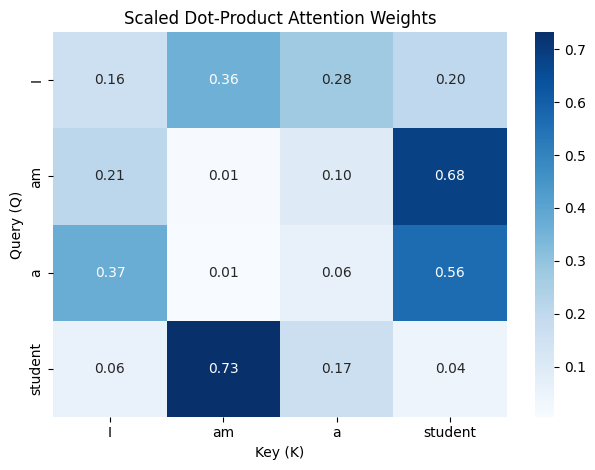


각 Query 단어가 어떤 Key 단어에 얼마나 주의를 기울였는지를 보인것


In [31]:
# Heatmap 시각화
sns.heatmap(weights.numpy(), annot=True, fmt=".2f", cmap='Blues',
            xticklabels=tokens, yticklabels=tokens)

plt.title("Scaled Dot-Product Attention Weights")
plt.xlabel("Key (K)")
plt.ylabel("Query (Q)")
plt.tight_layout()
plt.show()

print("\n각 Query 단어가 어떤 Key 단어에 얼마나 주의를 기울였는지를 보인것")